In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
df.shape

(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOJ']

C:\Users\avi\AppData\Local\Temp\ipykernel_568\2605558049.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])


0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3998, dtype: datetime64[ns]

In [7]:
unique_cities=df['JobCity'].unique()
unique_cities

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [8]:
df['JobCity']=df['JobCity'].str.strip().str.lower()
unique_cities_cleaned=df['JobCity'].unique()
unique_cities_cleaned

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '-1',
       'mohali', 'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai',
       'mumbai', 'new delhi', 'mangalore', 'rewari', 'gaziabaad',
       'bhiwadi', 'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar',
       'alwar', 'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar',
       'raigarh', 'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharam

In [9]:
df['DOL']=df['DOL'].apply(lambda x:"left" if x!="present" else x)
df.head()

Unnamed: 0      ID     Salary        DOJ      DOL               Designation  \
0      train  203097   420000.0 2012-06-01  present   senior quality engineer   
1      train  579905   500000.0 2013-09-01  present         assistant manager   
2      train  810601   325000.0 2014-06-01  present          systems engineer   
3      train  267447  1100000.0 2011-07-01  present  senior software engineer   
4      train  343523   200000.0 2014-03-01     left                       get   

     JobCity Gender           DOB  10percentage  ... ComputerScience  \
0  bangalore      f  2/19/90 0:00          84.3  ...              -1   
1     indore      m  10/4/89 0:00          85.4  ...              -1   
2    chennai      f   8/3/92 0:00          85.0  ...              -1   
3    gurgaon      m  12/5/89 0:00          85.6  ...              -1   
4    manesar      m  2/27/91 0:00          78.0  ...              -1   

   MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1          -1         -1             0.9737   
1              -1              -1          -1         -1            -0.7335   
2              -1              -1          -1         -1             0.2718   
3              -1              -1          -1         -1             0.0464   
4              -1              -1          -1         -1            -0.8810   

  agreeableness extraversion  nueroticism  openess_to_experience  
0        0.8128       0.5269      1.35490                -0.4455  
1        0.3789       1.2396     -0.10760                 0.8637  
2        1.7109       0.1637     -0.86820                 0.6721  
3        0.3448      -0.3440     -0.40780                -0.9194  
4       -0.2793      -1.0697      0.09163                -0.1295  

[5 rows x 39 columns]

In [10]:
df['DOL'].value_counts()

DOL
left       2123
present    1875
Name: count, dtype: int64

In [11]:
df['Salary'].mean()

307699.8499249625

In [12]:
df['Salary'].max()

4000000.0

In [13]:
df['Salary'].min()

35000.0

In [14]:
df['ComputerScience']=df['ComputerScience'].replace(-1,0)
df['MechanicalEngg']=df['MechanicalEngg'].replace(-1,0)
df['ElectricalEngg']=df['ElectricalEngg'].replace(-1,0)
df['TelecomEngg']=df['TelecomEngg'].replace(-1,0)
df['CivilEngg']=df['CivilEngg'].replace(-1,0)
df.head()

Unnamed: 0      ID     Salary        DOJ      DOL               Designation  \
0      train  203097   420000.0 2012-06-01  present   senior quality engineer   
1      train  579905   500000.0 2013-09-01  present         assistant manager   
2      train  810601   325000.0 2014-06-01  present          systems engineer   
3      train  267447  1100000.0 2011-07-01  present  senior software engineer   
4      train  343523   200000.0 2014-03-01     left                       get   

     JobCity Gender           DOB  10percentage  ... ComputerScience  \
0  bangalore      f  2/19/90 0:00          84.3  ...               0   
1     indore      m  10/4/89 0:00          85.4  ...               0   
2    chennai      f   8/3/92 0:00          85.0  ...               0   
3    gurgaon      m  12/5/89 0:00          85.6  ...               0   
4    manesar      m  2/27/91 0:00          78.0  ...               0   

   MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  conscientiousness  \
0               0               0           0          0             0.9737   
1               0               0           0          0            -0.7335   
2               0               0           0          0             0.2718   
3               0               0           0          0             0.0464   
4               0               0           0          0            -0.8810   

  agreeableness extraversion  nueroticism  openess_to_experience  
0        0.8128       0.5269      1.35490                -0.4455  
1        0.3789       1.2396     -0.10760                 0.8637  
2        1.7109       0.1637     -0.86820                 0.6721  
3        0.3448      -0.3440     -0.40780                -0.9194  
4       -0.2793      -1.0697      0.09163                -0.1295  

[5 rows x 39 columns]

In [15]:
df.describe()

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

       10percentage  12graduation  12percentage     CollegeID  CollegeTier  \
count   3998.000000   3998.000000   3998.000000   3998.000000  3998.000000   
mean      77.925443   2008.087544     74.466366   5156.851426     1.925713   
min       43.000000   1995.000000     40.000000      2.000000     1.000000   
25%       71.680000   2007.000000     66.000000    494.000000     2.000000   
50%       79.150000   2008.000000     74.400000   3879.000000     2.000000   
75%       85.670000   2009.000000     82.600000   8818.000000     2.000000   
max       97.760000   2013.000000     98.700000  18409.000000     2.000000   
std        9.850162      1.653599     10.999933   4802.261482     0.262270   

        collegeGPA  CollegeCityID  ...  ComputerScience  MechanicalEngg  \
count  3998.000000    3998.000000  ...      3998.000000     3998.000000   
mean     71.486171    5156.851426  ...        91.516758       23.915958   
min       6.450000       2.000000  ...         0.000000        0.000000   
25%      66.407500     494.000000  ...         0.000000        0.000000   
50%      71.720000    3879.000000  ...         0.000000        0.000000   
75%      76.327500    8818.000000  ...         0.000000        0.000000   
max      99.930000   18409.000000  ...       715.000000      623.000000   
std       8.167338    4802.261482  ...       174.867677       97.893295   

       ElectricalEngg  TelecomEngg    CivilEngg  conscientiousness  \
count     3998.000000  3998.000000  3998.000000        3998.000000   
mean        17.438469    32.757629     3.673337          -0.037831   
min          0.000000     0.000000     0.000000          -4.126700   
25%          0.000000     0.000000     0.000000          -0.713525   
50%          0.000000     0.000000     0.000000           0.046400   
75%          0.000000     0.000000     0.000000           0.702700   
max        676.000000   548.000000   516.000000           1.995300   
std         87.394072   104.568796    36.559052           1.028666   

       agreeableness  extraversion  nueroticism  openess_to_experience  
count    3998.000000   3998.000000  3998.000000            3998.000000  
mean        0.146496      0.002763    -0.169033              -0.138110  
min        -5.781600     -4.600900    -2.643000              -7.375700  
25%        -0.287100     -0.604800    -0.868200              -0.669200  
50%         0.212400      0.091400    -0.234400              -0.094300  
75%         0.812800      0.672000     0.526200               0.502400  
max         1.904800      2.535400     3.352500               1.822400  
std         0.941782      0.951471     1.007580               1.008075  

[8 rows x 28 columns]

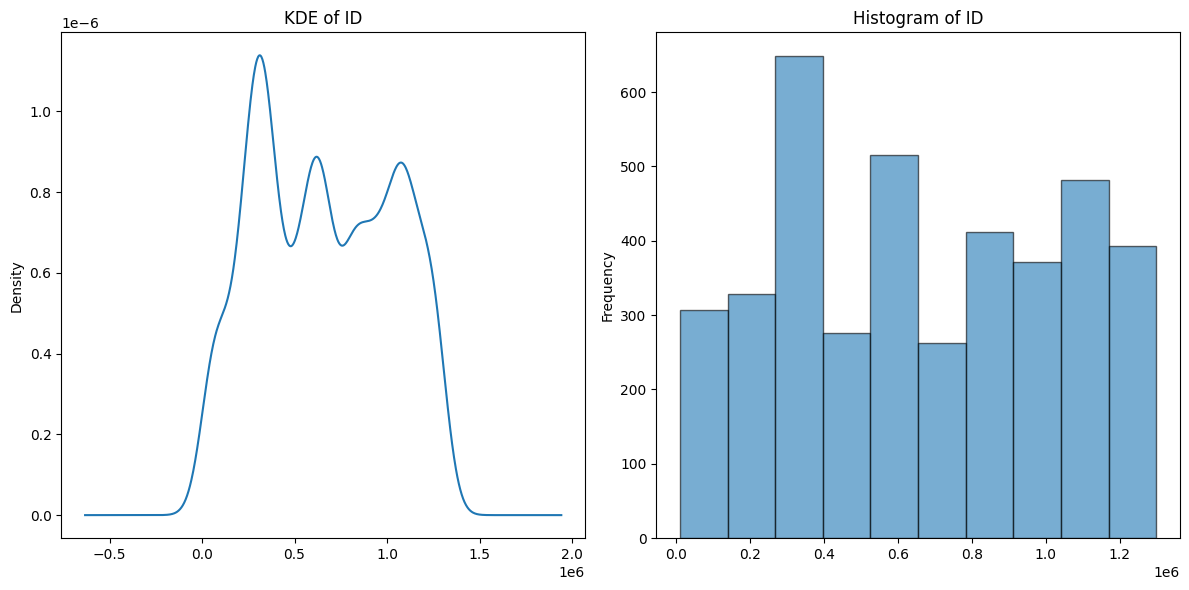

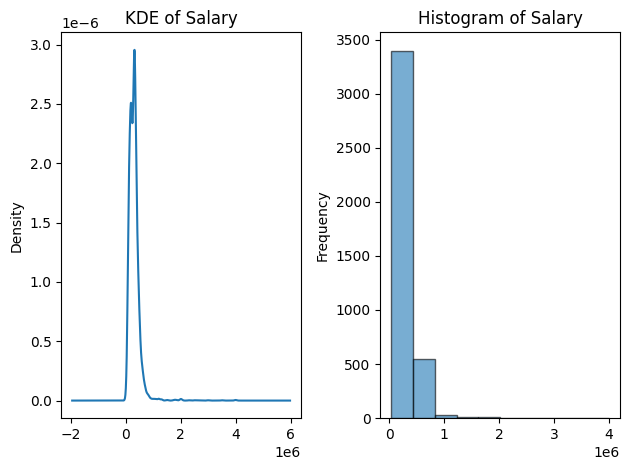

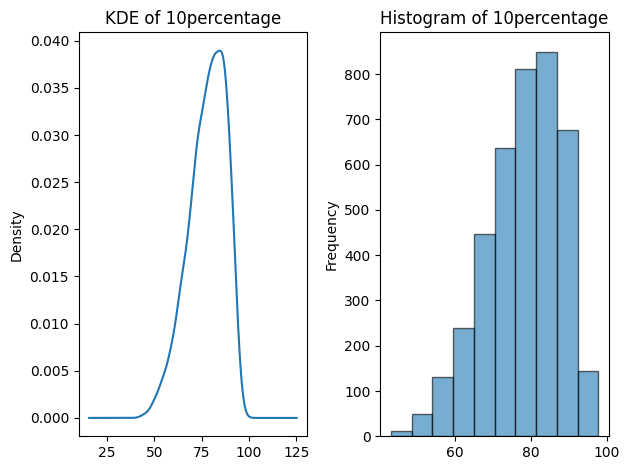

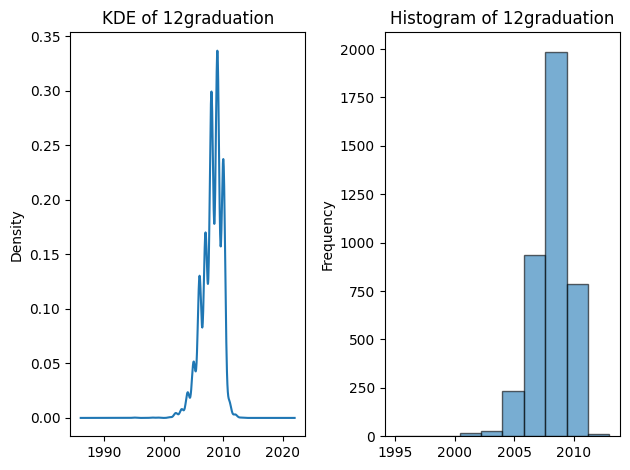

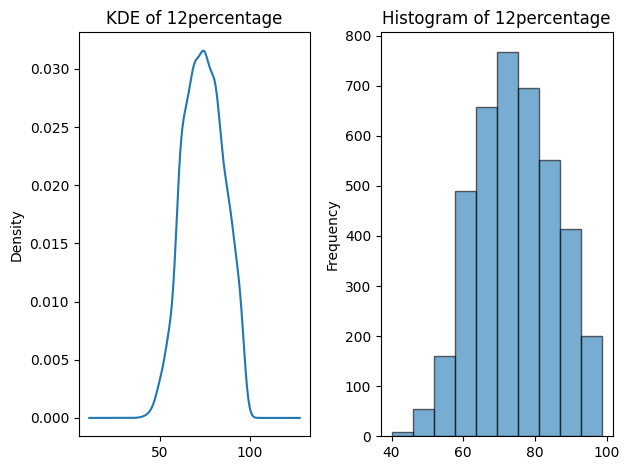

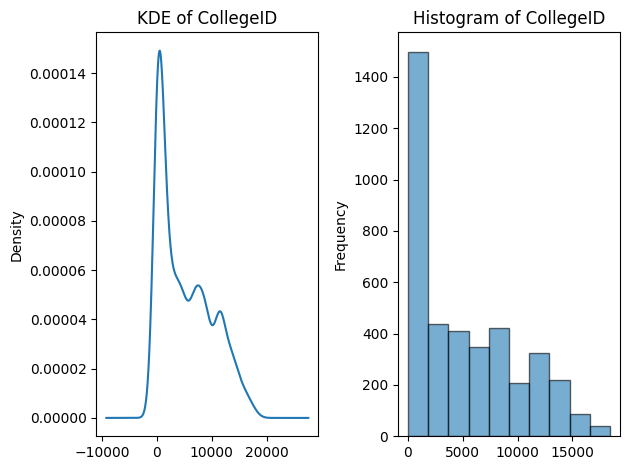

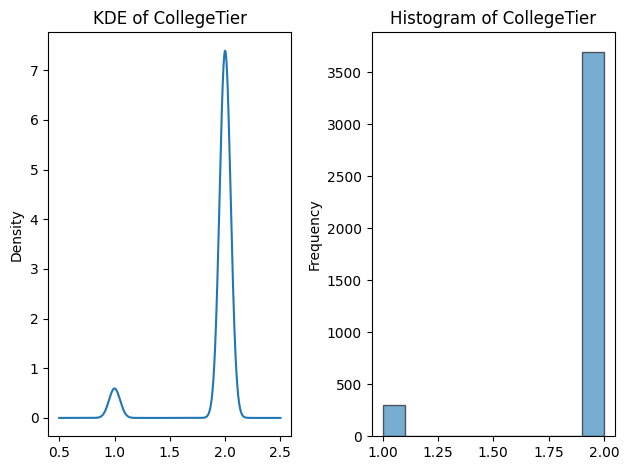

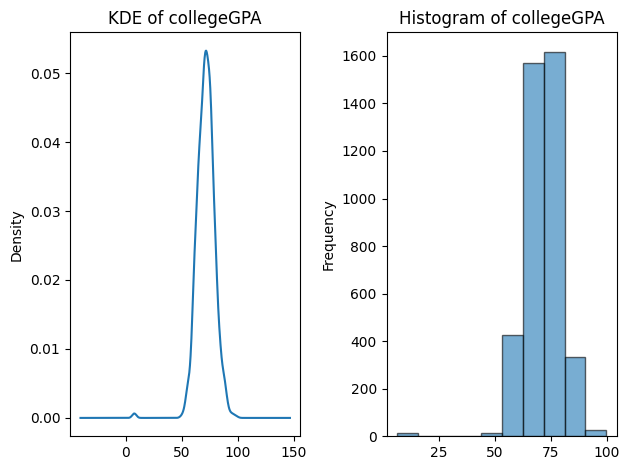

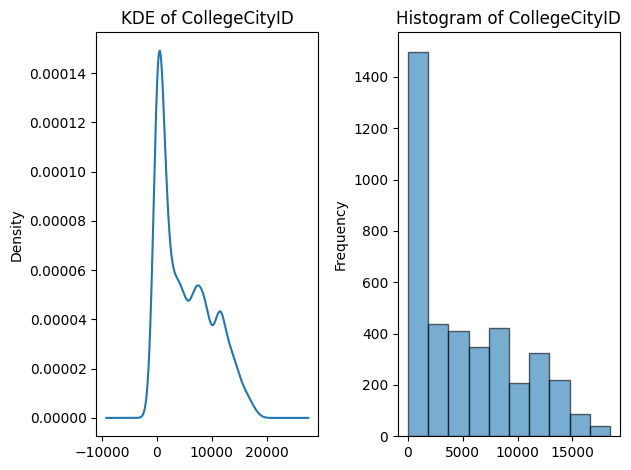

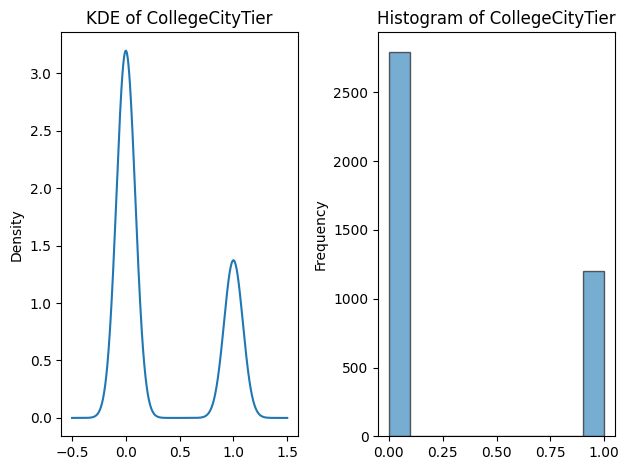

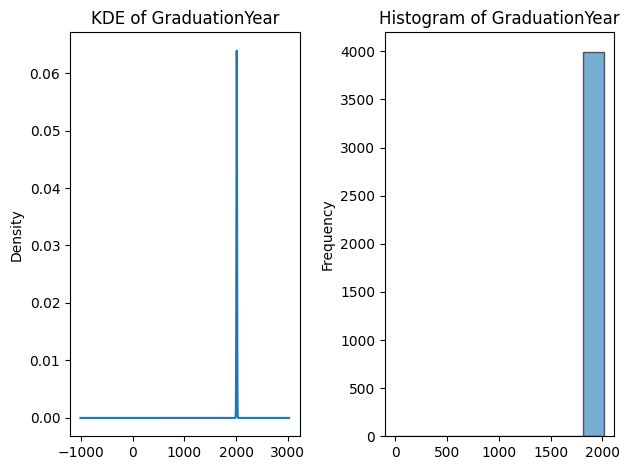

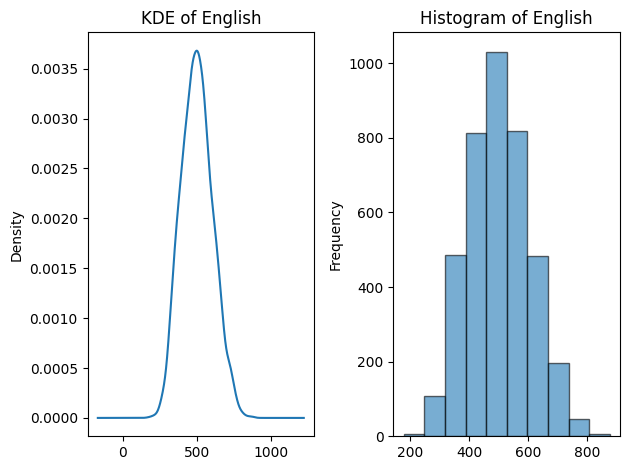

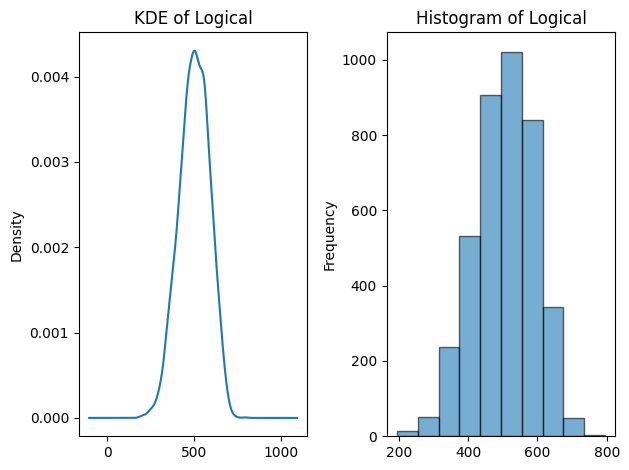

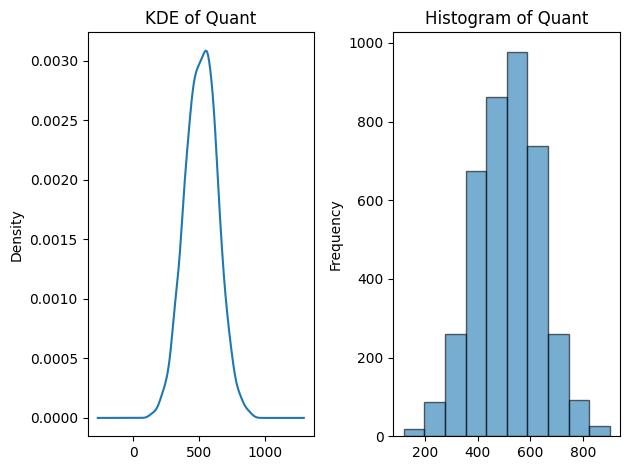

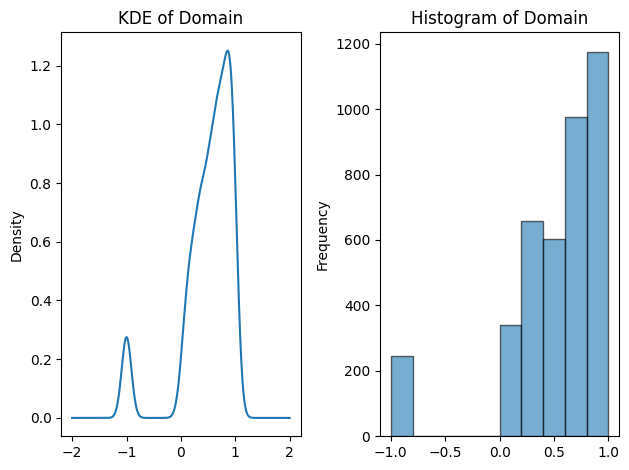

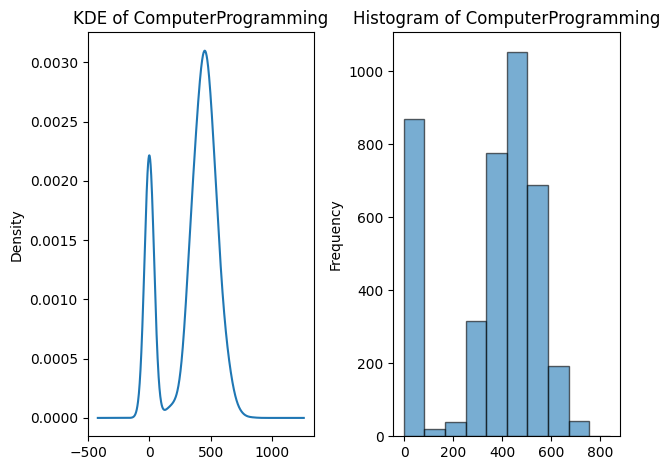

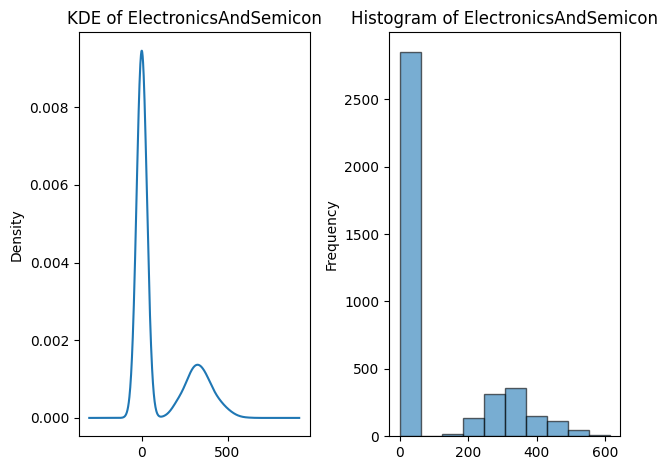

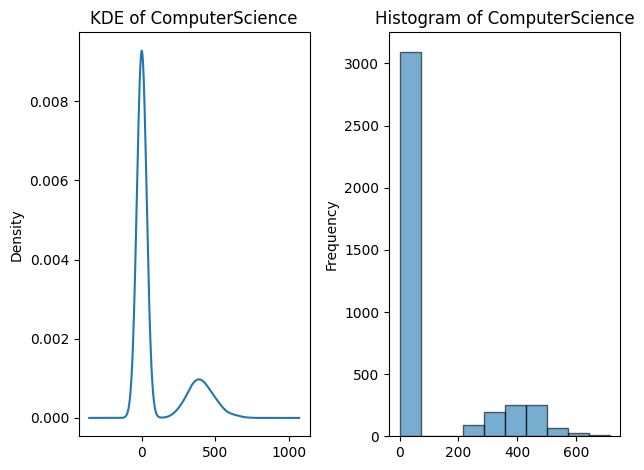

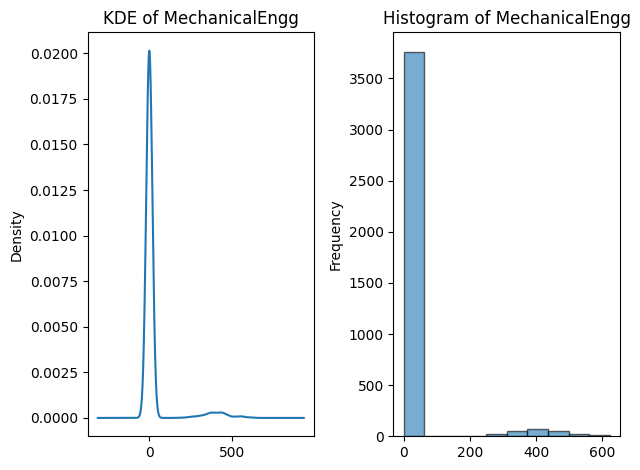

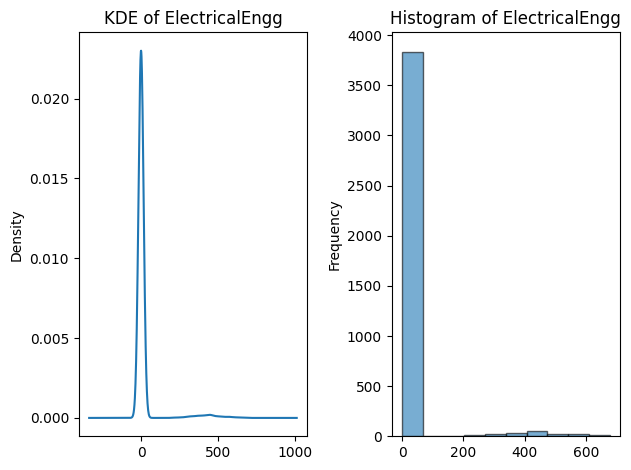

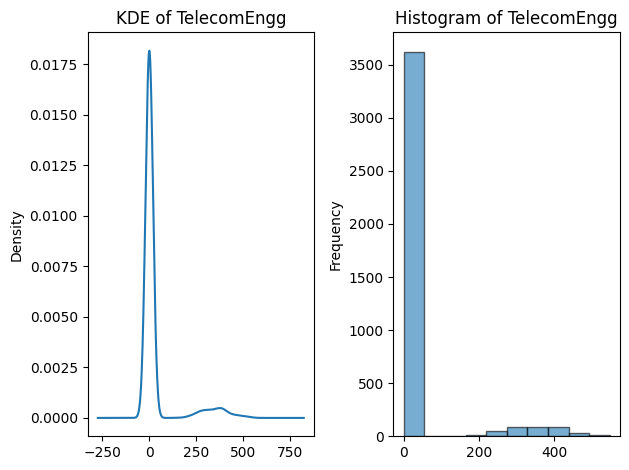

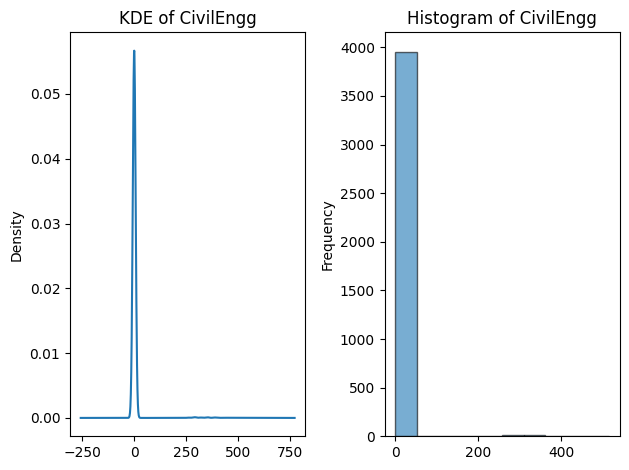

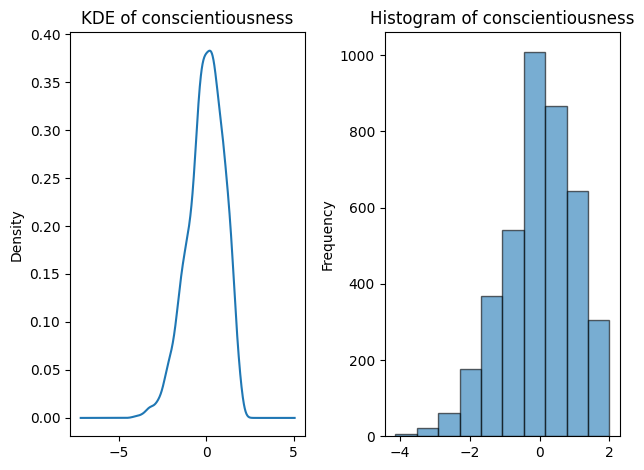

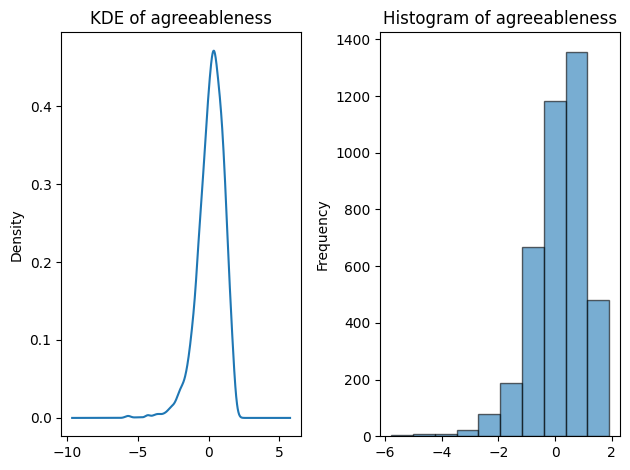

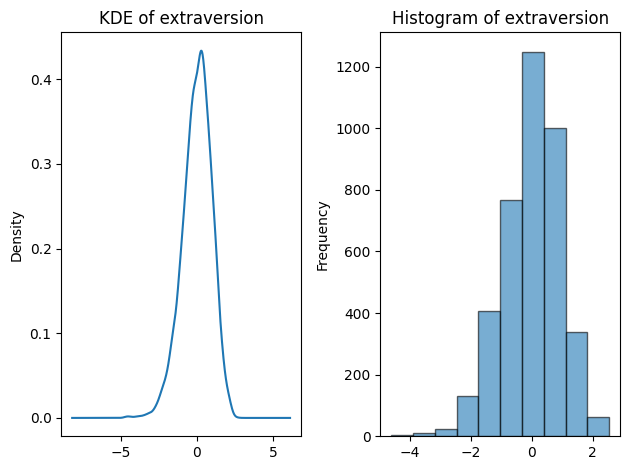

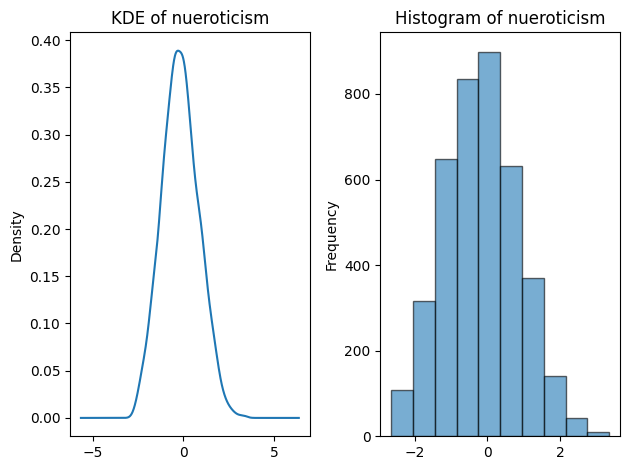

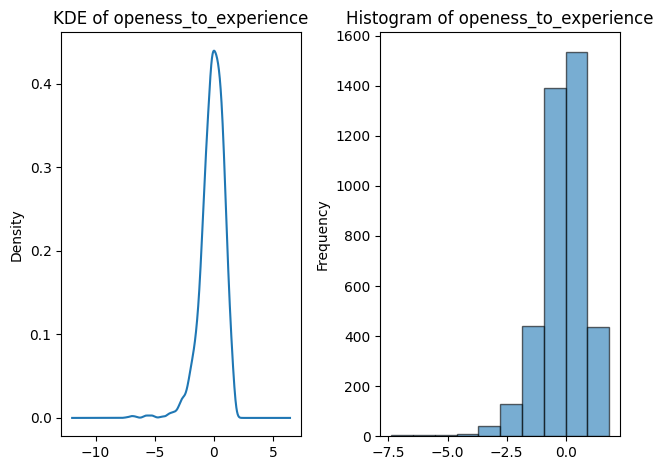

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
# Iterate through each numerical column
for col in numerical_columns:
    plt.subplot(1, 2, 1)  # First subplot for KDE
    df[col].plot(kind='kde', title=f'KDE of {col}')
    
    plt.subplot(1, 2, 2)  # Second subplot for Histogram
    df[col].plot(kind='hist', title=f'Histogram of {col}', alpha=0.6, edgecolor='black')
    
    plt.tight_layout()  # Adjusts subplots to fit into the figure area.
    plt.show()  # Display the plots for the current column

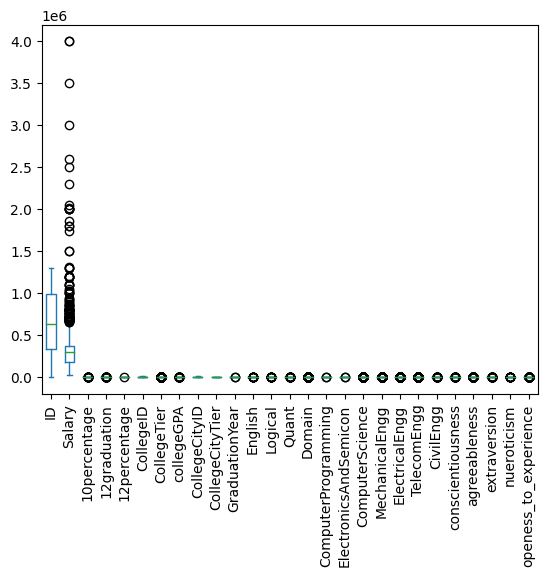

In [17]:
df[numerical_columns].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [18]:
df=df.drop('Unnamed: 0',axis=1)

In [19]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

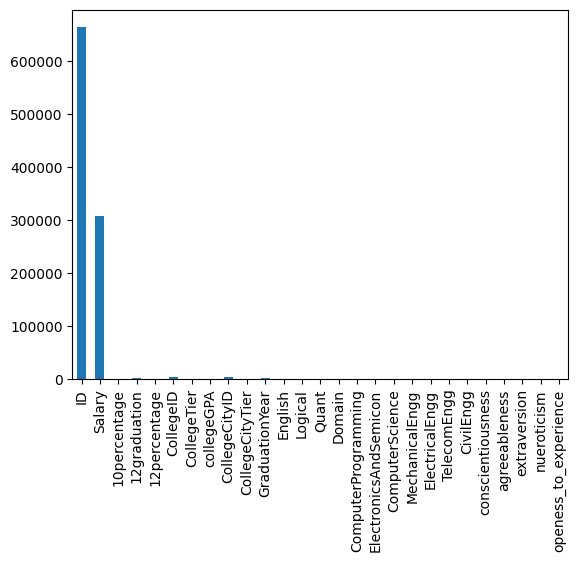

In [20]:
df[numerical_columns].mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

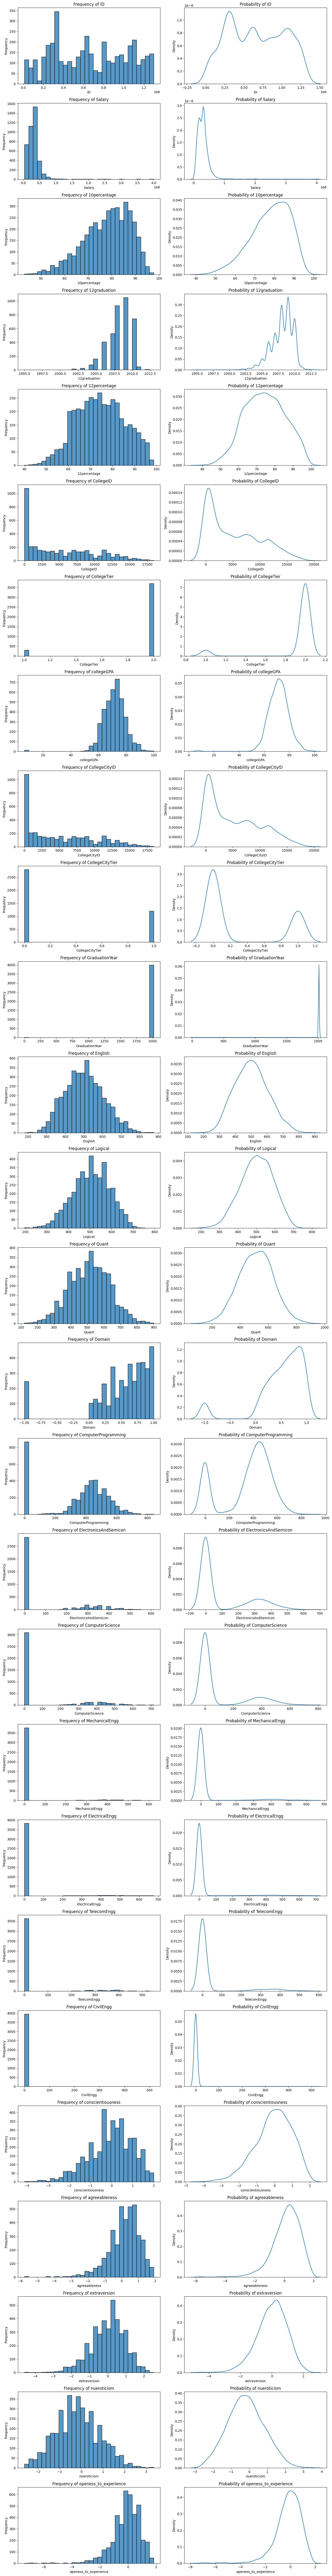

In [21]:
# Create subplots with the number of numerical columns
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col], ax=axes[i, 0], bins=30, kde=False)
    axes[i, 0].set_title(f'Frequency of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # KDE
    sns.kdeplot(df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Probability of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    
plt.tight_layout()
plt.show()



<Axes: xlabel='Gender'>

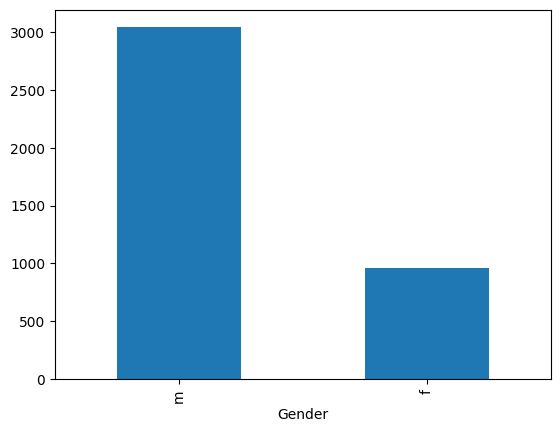

In [22]:
df['Gender'].value_counts().plot(kind='bar')

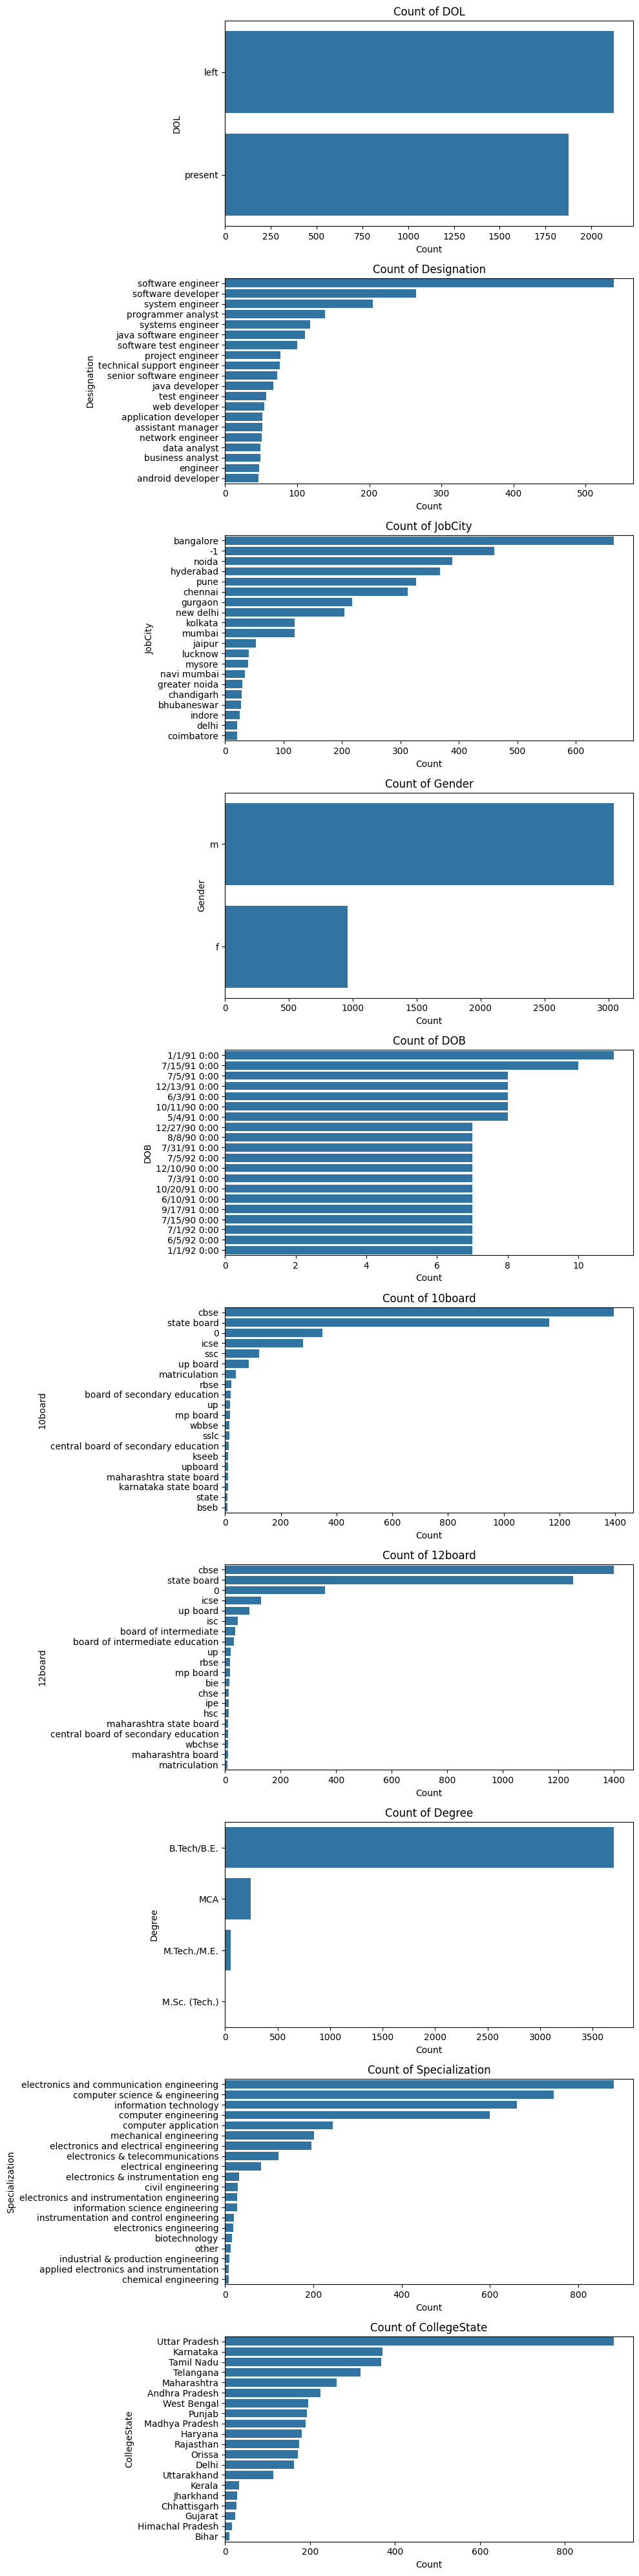

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the number of rows in the subplot to match the number of categorical columns
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns) * 4))

# Loop through the categorical columns
for i, col in enumerate(categorical_columns):
    # Get the top 20 values
    top_values = df[col].value_counts().nlargest(20)
    
    # Create barplot for each categorical column on the corresponding axis
    sns.barplot(x=top_values.values, y=top_values.index,ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# Bivariate analysis

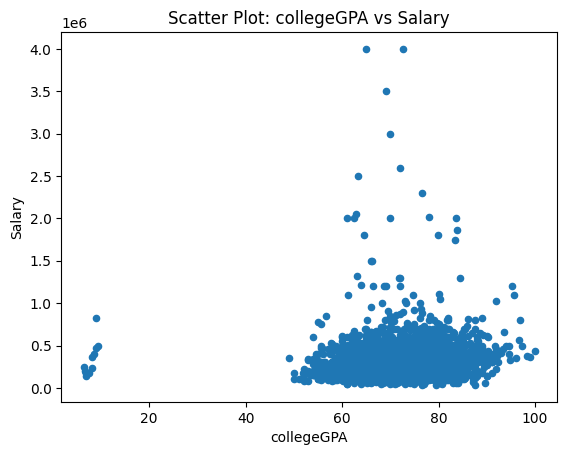

In [25]:
df.plot(kind='scatter', x='collegeGPA', y='Salary', title='Scatter Plot: collegeGPA vs Salary')
plt.show()

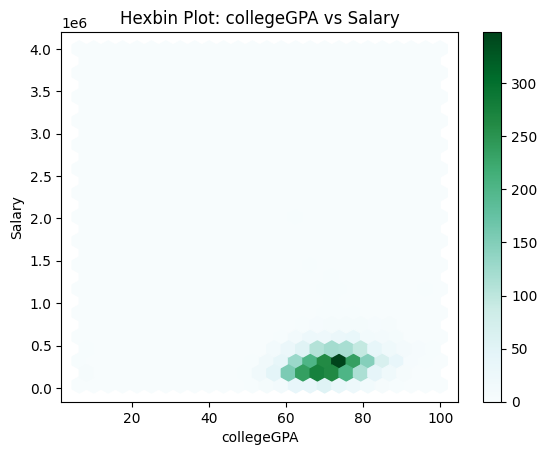

In [26]:
df.plot(kind='hexbin', x='collegeGPA', y='Salary', gridsize=25, title='Hexbin Plot: collegeGPA vs Salary')
plt.show()


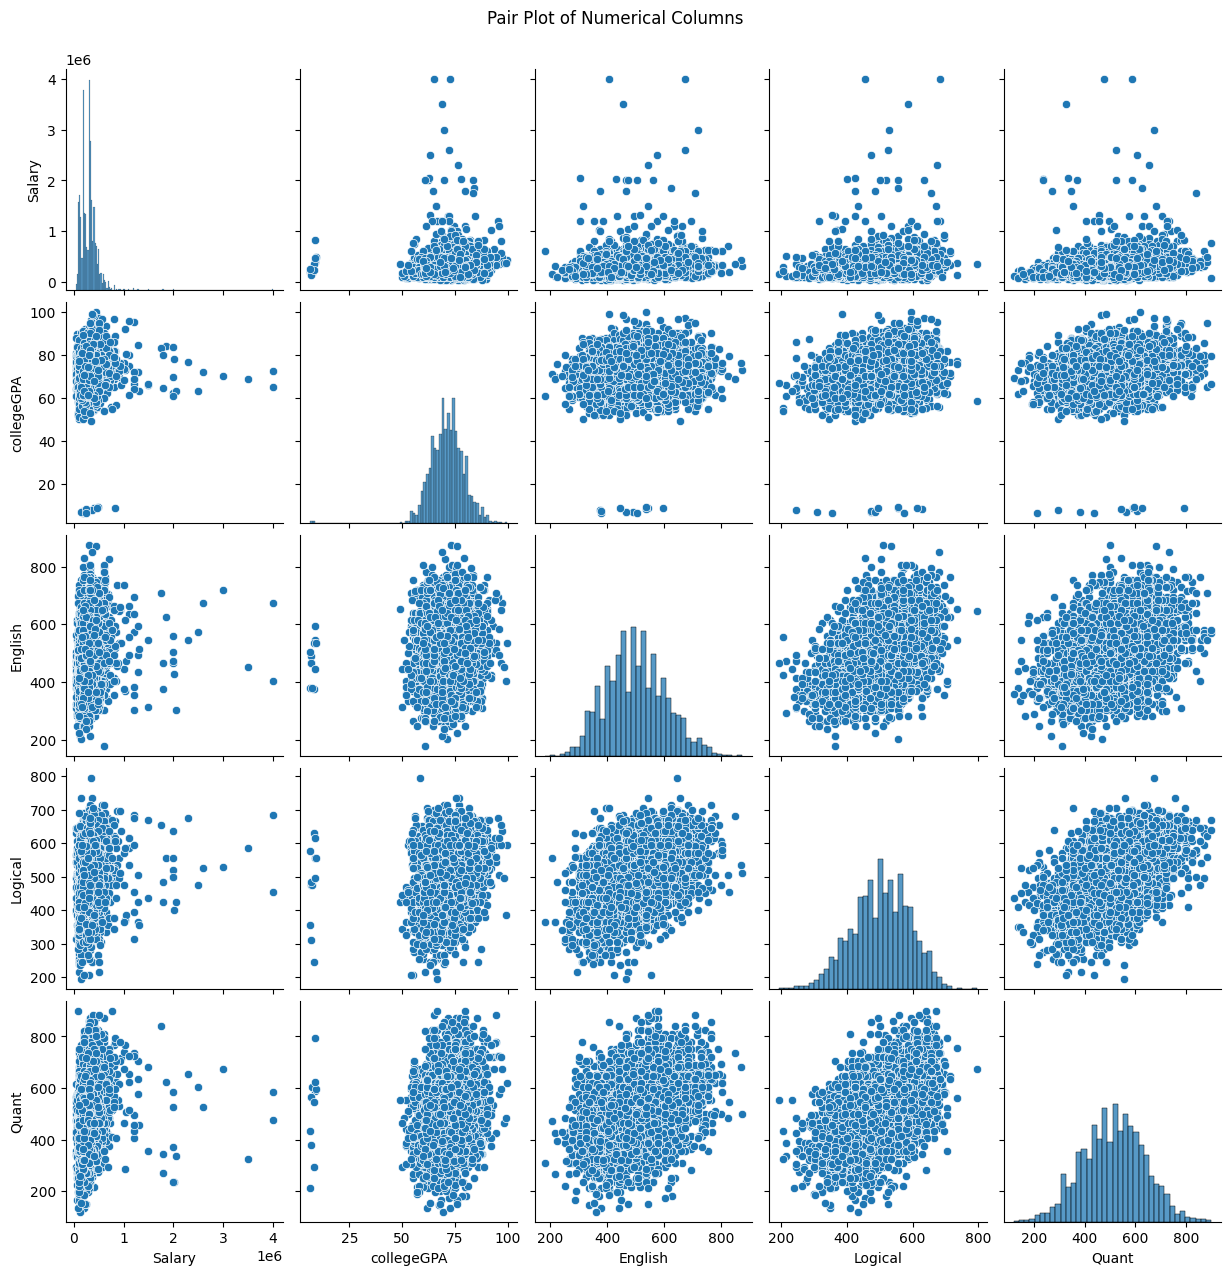

In [27]:
nc=['Salary', 'collegeGPA', 'English', 'Logical', 'Quant']
sns.pairplot(df[nc])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

<Axes: title={'center': 'Salary'}, xlabel='Degree'>

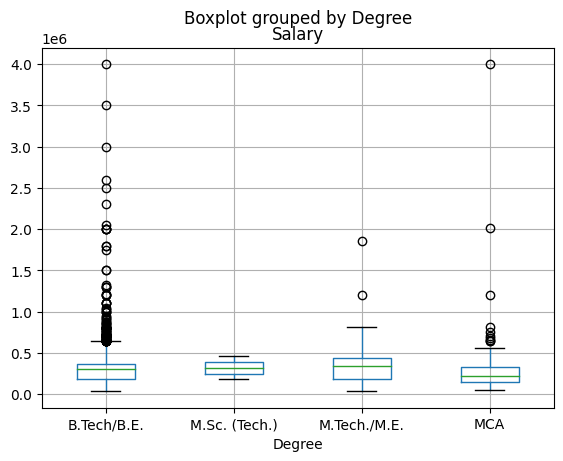

In [29]:
df.boxplot(by='Degree', column='Salary')

<Axes: xlabel='CollegeState'>

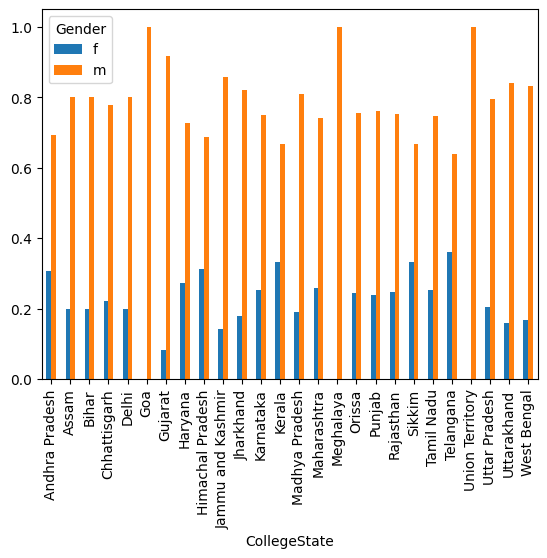

In [38]:
tab=pd.crosstab(df['CollegeState'],df['Gender'],normalize='index')
tab.plot(kind='bar')

In [39]:
# Research Question

In [40]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [46]:
fresh_graduates = df[df['Experience'] == 0]

roles_to_check = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

selected_roles = fresh_graduates[fresh_graduates['Role'].isin(roles_to_check)]

average_salary = selected_roles['Salary'].mean()

print(f"Average Salary for fresh graduates in specified roles: {average_salary} lakhs")

if 2.5 <= average_salary <= 3.0:
    print("The claim is TRUE. The average salary for fresh graduates is within the range of 2.5 to 3 lakhs.")
else:
    print("The claim is FALSE. The average salary for fresh graduates is not within the range of 2.5 to 3 lakhs.")

Average Salary for fresh graduates in specified roles: 2.8166666666666664 lakhs
The claim is TRUE. The average salary for fresh graduates is within the range of 2.5 to 3 lakhs.


In [50]:
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Conclusion based on p-value
alpha = 0.05  # significance level

if p_val < alpha:
    print("\nConclusion: There is a significant relationship between Gender and Specialization (reject the null hypothesis).")
else:
    print("\nConclusion: There is no significant relationship between Gender and Specialization (fail to reject the null hypothesis).")

KeyError: 'Gender'

KeyError: "None of [Index(['Gender', 'Specialization'], dtype='object')] are in the [columns]"